<a href="https://colab.research.google.com/github/ontenkutsenko/RL_Autonomous_Driving/blob/main/Individual%20Notebooks/RL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning Final Project

Welcome to your Reinforcement Learning project! Join in groups of a maximum of 5 students on a project focused on developing an RL agent capable of solving an environment for decision-making in Autonomous Driving. The project deadline has been set to the 2nd of June.

Autonomous Driving has long been considered a field in which RL algorithms excel, and this project aims to leverage the power of RL to create an intelligent agent that can solve the Farama’s foundation “highway-env” project, namely the Highway environment (refer to https://highway-env.farama.org/environments/highway/).

## Project Requirements:

* The environments observation’s format can vary according to our preference, namely Kinematics, Grayscale Image, Occupancy grid and Time to collision (refer to https://highway-env.farama.org/observations/). In your solutions you should use 2 of these types.
* The agents actions can also vary, as continuous actions, discrete actions and discrete meta-actions (refer to https://highway-env.farama.org/actions/). In your solutions you should use 2 of these types.
* As for the algorithms to use, any algorithm is valid (seen or not in class), with a minimum requirement of 3 different algorithms used.
* Apart from the environment observation types and agent action types you must use environment’s configuration provided in the annexed notebook!
Note: Your delivery should comprise 4 solutions to the highway environment (corresponding to the combinations of the two environment observation’s types and the two agent’s action types), in which you just need to use one algorithm for each combination (knowing that you need to use at least 3 different algorithms).


## Project Objectives:

* Train an RL agent to solve the Highway environment: The primary objective of this project is to develop an RL agent that can maximize the reward given by the highway environment (refer to https://highway-env.farama.org/rewards/), which leverages to maximize speed while minimizing crash risk!
* Optimize decision-making using RL algorithms: Explore different RL algorithms to train the agent. Compare and analyse their effectiveness in learning and decision-making capabilities in the context of the environment.
* Explore and expand on the reward system: Although you should evaluate your agent with the reward function provided by the environment, you could/should expand it to better train your agent.
* Enhance interpretability and analysis: Develop methods to analyse the agent's decision-making process and provide insights into its strategic thinking. Investigate techniques to visualize the agent's evaluation of chess positions and understand its reasoning behind specific moves.



### Extra Objectives:

* Investigate transfer learning and generalization: Explore techniques for transfer learning to leverage knowledge acquired in related domains or from pre-training on large chess datasets. Investigate the agent's ability to generalize its knowledge.
* Explore multi agent approaches: The environment allows you to use more than one agent per episode. Explore multi agent alternatives to improve your learning times and overall benchmarks.


## Imports Required

You might need to restart the kernel after installation

In [96]:
!pip install gymnasium highway-env stable-baselines3[extra]

In [97]:
import gymnasium as gym

import time
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm.notebook import tqdm
import itertools
import pickle
from stable_baselines3 import DQN
#from stable_baselines3.common.envs import DummyVecEnv
from gymnasium.spaces import Discrete, Box
from stable_baselines3 import A2C
import torch
from stable_baselines3.common.callbacks import BaseCallback

## Environment Configuration

Apart from the environment observation types and agent action types you must use some of the environment’s configurations provided bellow!

In [ ]:
""" configuration = {

    # Parametrization bellow cannot be changed
    "lanes_count": 10, # The environment must always have 10 lanes
    "vehicles_count": 50, # The environment must always have 50 other vehicles
    "duration": 120,  # [s] The environment must terminate never before 120 seconds
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle", # This is the policy of the other vehicles
    "initial_spacing": 2, # Initial spacing between vehicles needs to be at most 2

    # Refer to refer to https://highway-env.farama.org/observations/ to change observation space type
    "observation": {
        "type": "Kinematics"
    },

    # Refer to refer to https://highway-env.farama.org/actions/ to change action space type
    "action": {
        "type": "DiscreteMetaAction",
    },

    # Parameterization bellow can be changed (as it refers mostly to the reward system)
    "collision_reward": -1,  # The reward received when colliding with a vehicle. (Can be changed)
    "reward_speed_range": [20, 30],  # [m/s] The reward for high speed is mapped linearly from this range to [0, HighwayEnv.HIGH_SPEED_REWARD]. (Can be changed)
    "simulation_frequency": 15,  # [Hz] (Can be changed)
    "policy_frequency": 1,  # [Hz] (Can be changed)

    # Parameters defined bellow are purely for visualiztion purposes! You can alter them as you please
    "screen_width": 800,  # [px]
    "screen_height": 600,  # [px]
    "centering_position": [0.5, 0.5],
    "scaling": 5,
    "show_trajectories": False,
    "render_agent": True,
    "offscreen_rendering": False
} """

' configuration = {\n\n    # Parametrization bellow cannot be changed\n    "lanes_count": 10, # The environment must always have 10 lanes\n    "vehicles_count": 50, # The environment must always have 50 other vehicles\n    "duration": 120,  # [s] The environment must terminate never before 120 seconds\n    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle", # This is the policy of the other vehicles\n    "initial_spacing": 2, # Initial spacing between vehicles needs to be at most 2\n\n    # Refer to refer to https://highway-env.farama.org/observations/ to change observation space type\n    "observation": {\n        "type": "Kinematics"\n    },\n\n    # Refer to refer to https://highway-env.farama.org/actions/ to change action space type\n    "action": {\n        "type": "DiscreteMetaAction",\n    },\n\n    # Parameterization bellow can be changed (as it refers mostly to the reward system)\n    "collision_reward": -1,  # The reward received when colliding with a vehicle. (

## Example Solution
### Solution 0
Environment Observation Type: **Kinematics** \
Agent Action Type: **DiscreteMetaAction** \
Algorithm Used: **Random**

Example of the environment's usage using a random policy.

In [ ]:
""" env = env = gym.make('highway-v0', render_mode='human', config=configuration)

obs, info = env.reset(seed=42)
done = truncated = False

Return = 0
n_steps = 1
Episode = 0
while not (done or truncated):
  # Dispatch the observations to the model to get the tuple of actions
  action = env.action_space.sample()
  # Execute the actions
  next_obs, reward, done, truncated, info = env.step(action)
  Return+=reward

  print('Episode: {}, Step: {}, Return: {}'.format(Episode, n_steps, round(Return,2)))
  n_steps+=1
env.close() """

" env = env = gym.make('highway-v0', render_mode='human', config=configuration)\n\nobs, info = env.reset(seed=42)\ndone = truncated = False\n\nReturn = 0\nn_steps = 1\nEpisode = 0\nwhile not (done or truncated):\n  # Dispatch the observations to the model to get the tuple of actions\n  action = env.action_space.sample()\n  # Execute the actions\n  next_obs, reward, done, truncated, info = env.step(action)\n  Return+=reward\n\n  print('Episode: {}, Step: {}, Return: {}'.format(Episode, n_steps, round(Return,2)))\n  n_steps+=1\nenv.close() "

### Solution 1
Environment Observation Type: OccupanyGrid\
Agent Action Type: Discrete Meta Actions\
Algorithm Used: Q-Table

In [ ]:
def create_env(config):
    env = gym.make('highway-v0', config=config, render_mode='human')
    return env

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
occgrid_configuration = {
    "lanes_count": 10,
    "vehicles_count": 50,
    "duration": 120,
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle",
    "initial_spacing": 2,
    "observation": {
        "type": "OccupancyGrid",
        "features": ["presence"],
        "grid_size": [[-47.5, 47.5], [-47.5, 47.5]],
        "grid_step": [5, 5],
        "absolute": False,
    },
    "action": {"type": "DiscreteMetaAction"},
    "collision_reward": -10,
    "reward_speed_range": [20, 30],
    "simulation_frequency": 15,
    "policy_frequency": 1,
    "screen_width": 800,
    "screen_height": 600,
    "centering_position": [0.5, 0.5],
    "scaling": 5,
    "show_trajectories": True,
    "render_agent": True,
    "offscreen_rendering": False,
}

env = gym.make('highway-v0', config=occgrid_configuration, render_mode='human')


In [ ]:
class QLearningAgent:
    def __init__(self, action_space, learning_rate=0.1, discount_factor=0.99, exploration_rate=1.0, exploration_decay=0.99):
        self.action_space = action_space
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay
        self.q_table = defaultdict(lambda: np.zeros(action_space.n))

    def discretize_state(self, obs, slice_pos):
        # Hash the observation (Occupancy Grid) into a unique and consistent hashable state
        sliced_obs = obs[0][slice_pos - 1:-(slice_pos - 1), slice_pos:]
        return hash(sliced_obs.tostring())

    def choose_action(self, state, epsilon=None):
        if epsilon is None:
            epsilon = self.exploration_rate
        if np.random.rand() < epsilon:
            return self.action_space.sample()
        else:
            return np.argmax(self.q_table[state])

    def update_q_value(self, state, action, reward, next_state, done):
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.discount_factor * self.q_table[next_state][best_next_action] * (1 - done)
        td_delta = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.learning_rate * td_delta
        if done:
            self.exploration_rate *= self.exploration_decay

    def step(self, env, slice_pos, action, current_q_value, discrete_state, alpha, gamma, epsilon):
        next_state, r, truncated, done, _ = env.step(action)
        Done = done or truncated
        if Done:
            return 0, 0, 0, r, Done
        next_discrete_state = self.discretize_state(next_state, slice_pos)
        next_action = self.choose_action(next_discrete_state, epsilon)
        next_q_value = self.q_table[next_discrete_state][next_action]
        max_future_q_value = np.max(self.q_table[next_discrete_state])
        new_q_value = current_q_value + alpha * (r + gamma * max_future_q_value - current_q_value)
        self.q_table[discrete_state][action] = new_q_value
        return next_action, new_q_value, next_discrete_state, r, Done


In [ ]:
def train_agent(agent, env, slice_pos, num_iterations=100, alpha=0.85, gamma=0.9):
    returns = []
    EPSILON = 0.8
    EPSILON_DECAY = EPSILON / num_iterations

    for i in tqdm(range(num_iterations)):
        discrete_state = agent.discretize_state(env.reset(seed=np.random.randint(100))[0], slice_pos)
        action = agent.choose_action(discrete_state, EPSILON)
        current_q_value = agent.q_table[discrete_state][action]
        total_reward = 0
        done = False

        while not done:
            action, current_q_value, discrete_state, reward, done = agent.step(env, slice_pos, action, current_q_value, discrete_state, alpha, gamma, EPSILON)
            total_reward += reward

        returns.append(total_reward)
        EPSILON -= EPSILON_DECAY

    return returns


In [ ]:
def visualize_agent(agent, env, slice_pos):
    EPSILON = 0
    obs, info = env.reset(seed=np.random.randint(100))
    discrete_state = agent.discretize_state(obs, slice_pos)
    total_reward = 0
    done = False

    while not done:
        env.render()
        action = agent.choose_action(discrete_state, epsilon=EPSILON)
        next_obs, reward, truncated, done, _ = env.step(action)
        discrete_state = agent.discretize_state(next_obs, slice_pos)
        total_reward += reward

    env.close()
    return total_reward


  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\laech\AppData\Local\Temp\ipykernel_13940\1404084040.py:13: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return hash(sliced_obs.tostring())


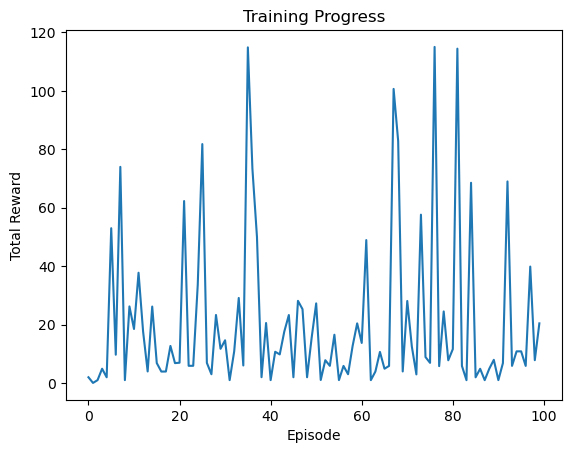

In [ ]:
# Instantiate the agent
agent = QLearningAgent(env.action_space)

# Training
slice_pos = 4  # Adjust as needed based on the grid size and features
returns = train_agent(agent, env, slice_pos, num_iterations=100, alpha=0.1, gamma=0.9)

# Plotting the training progress
plt.plot(returns)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Training Progress')
plt.show()

In [ ]:
# Visualization
total_reward = visualize_agent(agent, env, slice_pos)
print(f'Total Reward during Visualization: {total_reward}')

C:\Users\laech\AppData\Local\Temp\ipykernel_13940\1404084040.py:13: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return hash(sliced_obs.tostring())
c:\Anaconda\Lib\site-packages\highway_env\envs\common\abstract.py:276: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("highway-v0", render_mode="rgb_array")
  gym.logger.warn(


Total Reward during Visualization: 27.21883348399472


In [ ]:
def save_q_table(agent, filename):
    with open(filename, 'wb') as f:
        pickle.dump(dict(agent.q_table), f)
    print(f"Q-table saved to {filename}")

def load_q_table(agent, filename):
    with open(filename, 'rb') as f:
        q_table = pickle.load(f)
    agent.q_table = defaultdict(lambda: np.zeros(agent.action_space.n), q_table)
    print(f"Q-table loaded from {filename}")

In [ ]:
# save_q_table(agent, 'q_table.pkl')

### Solution 2
Environment Observation Type: Kinematics (Discretized)\
Agent Action Type: Discrete Meta Actions\
Algorithm Used: SARSA

In [ ]:
SARSA_configuration = {
    "lanes_count": 10,
    "vehicles_count": 50,
    "duration": 120,
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle",
    "initial_spacing": 2,
    "observation": {
        "type": "Kinematics",
        "features": ["x", "y", "vx", "vy"],
    },
    "action": {"type": "DiscreteMetaAction"},
    "collision_reward": -10,
    "reward_speed_range": [20, 30],
    "simulation_frequency": 15,
    "policy_frequency": 1,
    "screen_width": 800,
    "screen_height": 600,
    "centering_position": [0.5, 0.5],
    "scaling": 5,
    "show_trajectories": True,
    "render_agent": True,
    "offscreen_rendering": False,
}

env = gym.make('highway-v0', config=SARSA_configuration, render_mode='human')

In [ ]:
def discretize_observation(observation, bins):
    discretized = []
    for vehicle in observation:
        for i, feature in enumerate(vehicle):
            discretized.append(np.digitize(feature, bins[i]) - 1)
    return tuple(discretized)

def create_bins(num_bins, obs_low, obs_high):
    bins = []
    for low, high in zip(obs_low.flatten(), obs_high.flatten()):
        bins.append(np.linspace(low, high, num_bins + 1)[1:-1])
    return bins

In [ ]:
class SARSAAgent:
    def __init__(self, action_space, observation_space, learning_rate=0.1, discount_factor=0.99, exploration_rate=1.0, exploration_decay=0.99, num_bins=10):
        self.action_space = action_space
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay
        self.q_table = defaultdict(lambda: np.zeros(action_space.n))
        self.bins = create_bins(num_bins, observation_space.low, observation_space.high)

    def discretize_state(self, obs):
        return discretize_observation(obs, self.bins)

    def choose_action(self, state, epsilon=None):
        if epsilon is None:
            epsilon = self.exploration_rate
        if np.random.rand() < epsilon:
            return self.action_space.sample()
        else:
            return np.argmax(self.q_table[state])

    def update_q_value(self, state, action, reward, next_state, next_action, done):
        td_target = reward + self.discount_factor * self.q_table[next_state][next_action] * (1 - done)
        td_delta = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.learning_rate * td_delta
        if done:
            self.exploration_rate *= self.exploration_decay

    def step(self, env, state, action, alpha, gamma, epsilon):
        next_obs, reward, done, truncated, _ = env.step(action)
        next_state = self.discretize_state(next_obs)
        next_action = self.choose_action(next_state, epsilon)
        self.update_q_value(state, action, reward, next_state, next_action, done or truncated)
        return next_state, next_action, reward, done or truncated

In [ ]:
def train_agent(agent, env, num_iterations=1000, alpha=0.85, gamma=0.9, max_steps_per_episode=200):
    returns = []
    EPSILON = 0.8
    EPSILON_DECAY = EPSILON / num_iterations

    for i in tqdm(range(num_iterations)):
        obs, _ = env.reset(seed=np.random.randint(100))
        state = agent.discretize_state(obs)
        action = agent.choose_action(state, EPSILON)
        total_reward = 0
        done = False
        steps = 0

        while not done and steps < max_steps_per_episode:
            state, action, reward, done = agent.step(env, state, action, alpha, gamma, EPSILON)
            total_reward += reward
            steps += 1

        returns.append(total_reward)
        EPSILON -= EPSILON_DECAY

    return returns

In [ ]:
def visualize_agent(agent, env, max_steps_per_episode=200):
    EPSILON = 0
    obs, _ = env.reset(seed=np.random.randint(100))
    state = agent.discretize_state(obs)
    total_reward = 0
    done = False
    steps = 0

    while not done and steps < max_steps_per_episode:
        env.render()
        action = agent.choose_action(state, epsilon=EPSILON)
        next_obs, reward, done, truncated, _ = env.step(action)
        state = agent.discretize_state(next_obs)
        total_reward += reward
        done = done or truncated
        steps += 1

    env.close()
    return total_reward

In [ ]:
# Instantiate the agent
observation_space = env.observation_space
sarsa_agent = SARSAAgent(env.action_space, observation_space, num_bins=10)

# Training
returns = train_agent(sarsa_agent, env, num_iterations=100, alpha=0.1, gamma=0.9, max_steps_per_episode=200)

# Plotting the training progress
plt.plot(returns)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('SARSA Training Progress')
plt.show()

c:\Anaconda\Lib\site-packages\numpy\core\function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
c:\Anaconda\Lib\site-packages\numpy\core\function_base.py:167: RuntimeWarning: invalid value encountered in add
  y += start


  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
total_reward = visualize_agent(sarsa_agent, env, max_steps_per_episode=200)
print(f'Total Reward during Visualization (SARSA): {total_reward}')

## Solution 3
Environment Observation Type: Kinematics\
Agent Action Type: ContinuousActions (Discretized)\
Algorithm Used: DQN

In [99]:
continuous_action_configuration = {
    "lanes_count": 4,
    "vehicles_count": 50,
    "duration": 40,  # Maximum duration of each episode in seconds
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle",
    "initial_spacing": 2,
    "observation": {
        "type": "Kinematics",
        "features": ["x", "y", "vx", "vy"],
    },
    "action": {
        "type": "ContinuousAction",
        "acceleration_range": (-5, 5.0),
        "steering_range": (-0.7853981633974483, 0.7853981633974483),
        "longitudinal": True,
        "lateral": True,
        "dynamical": False,
        "clip": True
    },
    "collision_reward": -10,
    "reward_speed_range": [20, 30],
    "simulation_frequency": 15,
    "policy_frequency": 1,
    "screen_width": 800,
    "screen_height": 600,
    "centering_position": [0.5, 0.5],
    "scaling": 5,
    "show_trajectories": True,
    "render_agent": True,
    "offscreen_rendering": False,
}

env = gym.make('highway-v0', config=continuous_action_configuration)

In [100]:
# Define discrete action steps for steering and acceleration
steering_actions = np.linspace(-0.7853981633974483, 0.7853981633974483, 5)  # 5 discrete steps for steering
acceleration_actions = np.linspace(-5, 5, 5)  # 5 discrete steps for acceleration

# Create a list of all possible discrete actions (cartesian product of steering and acceleration steps)
discrete_actions = [(steer, accel) for steer in steering_actions for accel in acceleration_actions]

# Convert the discrete action list to a numpy array for easier indexing
discrete_actions = np.array(discrete_actions)

In [101]:
class DiscretizedContinuousActionWrapper(gym.Env):
    def __init__(self, env, discrete_actions):
        self.env = env
        self.discrete_actions = discrete_actions
        self.action_space = Discrete(len(discrete_actions))
        self.observation_space = env.observation_space

    def step(self, action):
        continuous_action = self.discrete_actions[action]
        obs, reward, done, truncated, info = self.env.step(continuous_action)
        return obs, reward, done, truncated, info

    def reset(self, **kwargs):
        return self.env.reset(**kwargs)

    def render(self, mode='human'):
        return self.env.render()

    def close(self):
        return self.env.close()

    def seed(self, seed=None):
        return self.env.seed(seed)

In [102]:
env = DiscretizedContinuousActionWrapper(env, discrete_actions) # discretize space

In [104]:
env.configuration

AttributeError: 'DiscretizedContinuousActionWrapper' object has no attribute 'configuration'

In [92]:
model = DQN('MlpPolicy', env, verbose=1)

#model.save("dqn_highway")

#model = DQN.load("dqn_highway", env=env)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [93]:
class RewardCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(RewardCallback, self).__init__(verbose)
        self.episode_rewards = []
        self.current_rewards = 0

    def _on_step(self) -> bool:
        self.current_rewards += self.locals['rewards'][0]
        if self.locals['dones'][0]:
            self.episode_rewards.append(self.current_rewards)
            self.current_rewards = 0
        return True

reward_callback = RewardCallback()

In [94]:
model.learn(total_timesteps=3000, callback=reward_callback)

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 6.47     |
|    exploration_rate | 0.493    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1        |
|    time_elapsed     | 95       |
|    total_timesteps  | 160      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0876   |
|    n_updates        | 14       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 12.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1        |
|    time_elapsed     | 188      |
|    total_timesteps  | 320      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.216    |
|    n_updates      

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


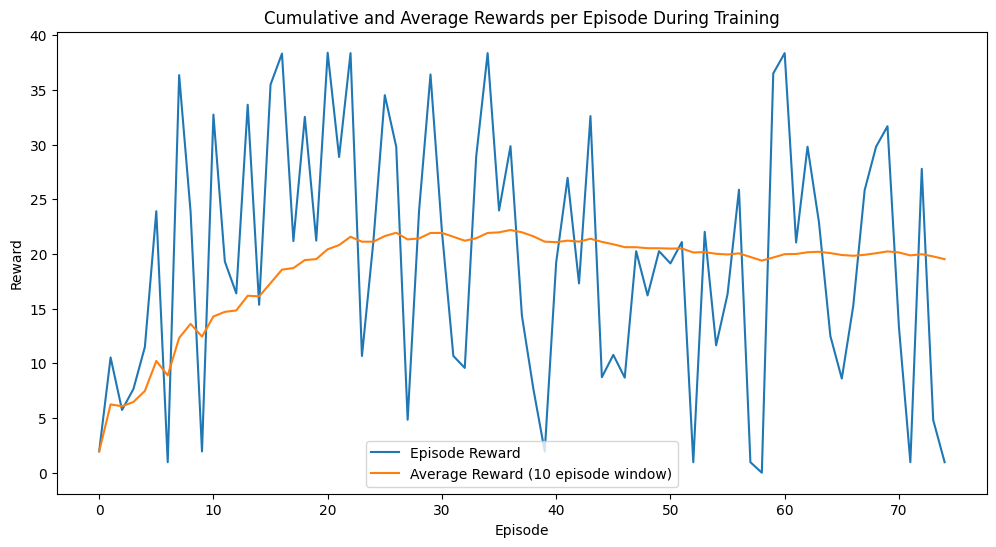

In [95]:
# Calculate cumulative rewards
#cumulative_rewards = np.cumsum(reward_callback.episode_rewards)
#average_rewards = np.convolve(reward_callback.episode_rewards, np.ones(8)/8, mode='valid')

cumulative_rewards = np.cumsum(reward_callback.episode_rewards)
average_rewards = np.cumsum(reward_callback.episode_rewards) / np.arange(1, len(reward_callback.episode_rewards) + 1)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(reward_callback.episode_rewards, label='Episode Reward')
plt.plot(np.arange(len(average_rewards)), average_rewards, label='Average Reward (10 episode window)')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Cumulative and Average Rewards per Episode During Training')
plt.legend()
plt.show()

In [87]:
# def evaluate_agent(env, model, episodes=5):
#     evaluation_data = {
#         'observations': [],
#         'actions': [],
#         'rewards': [],
#         'cumulative_rewards': []
#     }

#     for episode in range(episodes):
#         obs, info = env.reset()
#         episode_rewards = 0
#         done = False
#         episode_observations = []
#         episode_actions = []
#         episode_rewards_list = []

#         while not done:
#             action, _ = model.predict(obs, deterministic=True)
#             obs, reward, done, truncated, info = env.step(action)

#             episode_observations.append(obs)
#             episode_actions.append(action)
#             episode_rewards_list.append(reward)
#             episode_rewards += reward

#         evaluation_data['observations'].append(episode_observations)
#         evaluation_data['actions'].append(episode_actions)
#         evaluation_data['rewards'].append(episode_rewards_list)
#         evaluation_data['cumulative_rewards'].append(episode_rewards)

#     return evaluation_data

# # Run evaluation
# evaluation_data = evaluate_agent(env, model, episodes=5)

def evaluate_agent(env, model, discrete_actions, episodes=5):
    evaluation_data = {
        'observations': [],
        'actions': [],
        'rewards': [],
        'cumulative_rewards': []
    }

    for episode in range(episodes):
        obs, info = env.reset()
        episode_rewards = 0
        done = False
        episode_observations = []
        episode_actions = []
        episode_rewards_list = []

        while not done:
            action_index, _ = model.predict(obs, deterministic=True)
            action = discrete_actions[action_index]  # Map action index back to continuous action tuple

            # Print action shape and value for debugging
            print("Action index:", action_index)
            print("Mapped action value:", action)

            obs, reward, done, truncated, info = env.step(action)

            episode_observations.append(obs)
            episode_actions.append(action)  # Store the continuous action tuples
            episode_rewards_list.append(reward)
            episode_rewards += reward

        evaluation_data['observations'].append(episode_observations)
        evaluation_data['actions'].append(episode_actions)
        evaluation_data['rewards'].append(episode_rewards_list)
        evaluation_data['cumulative_rewards'].append(episode_rewards)

    return evaluation_data

    return evaluation_data
# Run evaluation
evaluation_data = evaluate_agent(env, model, discrete_actions, episodes=1)

Action index: 12
Mapped action value: [0. 0.]


IndexError: arrays used as indices must be of integer (or boolean) type

In [81]:
# Ensure actions are collected as tuples and convert to 2D array
first_episode_observations = np.array(evaluation_data['observations'][0])
first_episode_actions = np.array(evaluation_data['actions'][0], dtype=object)
first_episode_rewards = np.array(evaluation_data['rewards'][0])

# Print the shape of the actions to debug
print("Shape of first_episode_actions before vstack:", first_episode_actions.shape)

# Convert actions to a 2D numpy array by stacking
first_episode_actions = np.array([list(action) for action in first_episode_actions])

# Print the shape after stacking to verify
print("Shape of first_episode_actions after conversion:", first_episode_actions.shape)

# Ensure the array has the correct dimensions
if first_episode_actions.shape[1] == 2:
    # Plot steering and acceleration actions separately
    plt.figure(figsize=(12, 6))
    plt.plot(first_episode_actions[:, 0], label='Steering Actions')
    plt.plot(first_episode_actions[:, 1], label='Acceleration Actions')
    plt.xlabel('Time Step')
    plt.ylabel('Action Value')
    plt.title('Actions Taken by Agent in First Evaluation Episode')
    plt.legend()
    plt.show()
else:
    print("Error: Actions array does not have two columns as expected.")

Shape of first_episode_actions before vstack: (38,)


TypeError: iteration over a 0-d array

## Solution 4
Environment Observation Type: Kinematics\
Agent Action Type: ContinuousActions\
Algorithm Used: A2C

In [ ]:
kinematics_continuous_configuration = {
    "lanes_count": 4,
    "vehicles_count": 50,
    "duration": 40,  # Maximum duration of each episode in seconds
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle",
    "initial_spacing": 2,
    "observation": {
        "type": "Kinematics",
        "features": ["x", "y", "vx", "vy"],
    },
    "action": {
        "type": "ContinuousAction",
        "acceleration_range": (-5, 5.0),
        "steering_range": (-0.7853981633974483, 0.7853981633974483),
        "longitudinal": True,
        "lateral": True,
        "dynamical": False,
        "clip": True
    },
    "collision_reward": -10,
    "reward_speed_range": [20, 30],
    "simulation_frequency": 15,
    "policy_frequency": 1,
    "screen_width": 800,
    "screen_height": 600,
    "centering_position": [0.5, 0.5],
    "scaling": 5,
    "show_trajectories": True,
    "render_agent": True,
    "offscreen_rendering": False,
}

env = gym.make('highway-v0', config=kinematics_continuous_configuration, render_mode='human')

In [ ]:
model = A2C('MlpPolicy', env, verbose=1, learning_rate=1e-3, n_steps=5, gamma=0.99, device='cuda')

model.learn(total_timesteps=100)

model.save("a2c_highway")

# model = A2C.load("a2c_highway", env=env)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
obs, _ = env.reset()
total_reward = 0
done = False
steps = 0

while not done and steps < 200:
    env.render()
    action, _ = model.predict(obs)
    obs, reward, done, truncated, info = env.step(action)
    total_reward += reward
    steps += 1

env.close()
print(f"Total Reward during Visualization: {total_reward}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total Reward during Visualization: 7.71274118476135
